In [10]:
"""

Automatic Higher or Lower game.

Set the bounds between 1 and 20. The Graph has to keep guessing (max number of guesses is 7) where if the guess is correct, then it stops, but if not we keep looping until we hit the max of 7.

Each time a number is guessed, the hint node should say higher or lower and the graph should account for this information and guess the next guess accordingly.

Input: {"player_name": "Student", "guesses": [], "attempts": 0, "lower_bound": 1, "upper_bound": 20}

Hint: It will need to adjust its bounds after every guess based on the hint provided by the hint node.
"""

'\n\nAutomatic Higher or Lower game.\n\nSet the bounds between 1 and 20. The Graph has to keep guessing (max number of guesses is 7) where if the guess is correct, then it stops, but if not we keep looping until we hit the max of 7.\n\nEach time a number is guessed, the hint node should say higher or lower and the graph should account for this information and guess the next guess accordingly.\n\nInput: {"player_name": "Student", "guesses": [], "attempts": 0, "lower_bound": 1, "upper_bound": 20}\n\nHint: It will need to adjust its bounds after every guess based on the hint provided by the hint node.\n'

In [11]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END
import random

In [12]:
class GameState(TypedDict):
  player_name: str
  target_number: int
  guesses: List[int]
  attempts: int
  hint: str
  lower_bound: int
  upper_bound: int

In [60]:
def setup_node(state: GameState) -> GameState:
  """ Initializes the setup to choose the target number """

  state['player_name'] = f"Welcome, {state['player_name']}"
  state['target_number'] = random.randint(1, 20)
  state['guesses'] = []
  state['attempts'] = 0
  state['hint'] = "Game started! Try to guess the number."
  state['lower_bound'] = 1
  state['upper_bound'] = 20
  print(f"{state['player_name']} The game has begun. I'm thinking of a number between 1 and 20.")
  print(f"TARGET: {state['target_number']}")
  return state

In [91]:
def guess_node(state: GameState) -> GameState:
  """ This node decides the guess of the number between 1 and 20. Produces the bext next guess """

  all_numbers = list(range(20))
  available_numbers = [number for number in all_numbers if number not in state['guesses']]

  guess = random.choice(available_numbers)

  state['guesses'].append(guess)

  state['attempts'] += 1
  print(f"Attempt {state['attempts']}: Guess = {guess}")


  return state

In [92]:
def hint_node(state: GameState) -> GameState:
  """ Compares whether the guess is higher or lower than the target number """

  last_guess = state['guesses'][-1]
  target = state['target_number']

  if last_guess < target:
    state['hint'] = "higher"
    state['lower_bound'] = last_guess + 1
    print(f"Hint: Number is too low. Try {state['hint']}! (range {state['lower_bound']} - {state['upper_bound']})")

  elif last_guess > target:
    state['hint'] = "lower"
    state['upper_bound'] = last_guess - 1
    print(f"Hint: Number is too loo high. Try {state['hint']}! (range {state['lower_bound']} - {state['upper_bound']})")

  else:
    state['hint'] = "correct"


  return state


In [93]:
def should_continue(state: GameState) -> str:
  """ Determines whether to continue or exit the game """


  if state['attempts'] >= 7:
    print("EXITING THE GAME")
    return "exit"

  if state['target_number'] in state['guesses']:
    print("EXITING THE GAME: target guessed!")
    return "exit"

  print('CONTINUING')
  return "continue"

In [94]:
graph = StateGraph(state_schema = GameState)

graph.add_node("setup", setup_node)
graph.add_node("guess", guess_node)
graph.add_node("hint", hint_node)

graph.add_edge("setup", "guess")
graph.add_edge("guess", "hint")
graph.add_conditional_edges(
    "hint", # Source Node
    should_continue,
    {
        # Edge: Node
        "continue": "guess",
        "exit": END
    }

)

graph.set_entry_point("setup")
app = graph.compile()

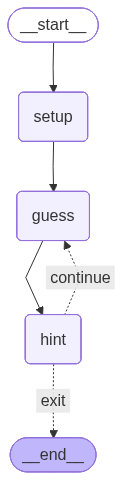

In [95]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [96]:
answer = app.invoke({"player_name": "Student", "guesses": [], "attempts": 0, "lower_bound": 1, "upper_bound": 20})


Welcome, Student The game has begun. I'm thinking of a number between 1 and 20.
TARGET: 15
Attempt 1: Guess = 2
Hint: Number is too low. Try higher! (range 3 - 20)
CONTINUING
Attempt 2: Guess = 6
Hint: Number is too low. Try higher! (range 7 - 20)
CONTINUING
Attempt 3: Guess = 11
Hint: Number is too low. Try higher! (range 12 - 20)
CONTINUING
Attempt 4: Guess = 19
Hint: Number is too loo high. Try lower! (range 12 - 18)
CONTINUING
Attempt 5: Guess = 3
Hint: Number is too low. Try higher! (range 4 - 18)
CONTINUING
Attempt 6: Guess = 14
Hint: Number is too low. Try higher! (range 15 - 18)
CONTINUING
Attempt 7: Guess = 4
Hint: Number is too low. Try higher! (range 5 - 18)
EXITING THE GAME
